# COURSE: A deep understanding of deep learning
## SECTION: Running models on a GPU
### LECTURE: Implementation
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [2]:
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [3]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [4]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [5]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [6]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [7]:
data

tensor([[-0.9165, -2.5159, -1.6835,  ...,  1.9936,  0.5289,  0.6592],
        [ 0.4153, -0.5394, -0.9657,  ...,  1.9722,  2.0432,  1.7086],
        [ 0.9558, -0.0325, -2.1947,  ...,  0.7807,  1.7686, -0.1845],
        ...,
        [ 0.5104, -0.3052,  0.9851,  ...,  0.1436, -2.0308, -0.5910],
        [-2.4501,  1.0339, -1.5690,  ..., -0.3414,  0.0427,  0.0826],
        [ 0.8898,  0.0451,  0.9994,  ..., -0.2125, -0.2440, -0.0324]],
       device='cuda:0')

In [8]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [9]:
output = net(data)

In [10]:
output.device

device(type='cuda', index=0)

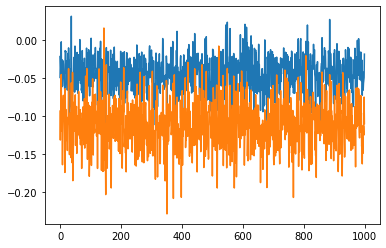

In [12]:
# try to plot the data
# plt.plot(output.detach());

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [13]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [14]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [15]:
# time in ms
[CPUtime,GPUtime]

[0.0, 0.0]

In [16]:
# but maybe "sending" it to the CPU takes too much overhead?

In [17]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[0.0, 0.0, 0.0]